## Background

### In my R project, I looked at the statistical significance at the state level of what factors affect housing prices. My husband is in the military, and we have been stationed overseas for two tours now, and we are interested in purchasing a house when we return to the US.

### In this Python project, I will narrow the scope and focus on specific areas where we can get stationed to see what factors affect the price and if there are better times to purchase a house.

In [1]:
import pandas as pd

metro_housing = pd.read_csv(r'C:\Users\kadyr\OneDrive\Documents\RDC_Inventory_Core_Metrics_Metro_History.csv',
                            dtype = {'cbsa_code': 'str'}, low_memory = False)

## Data Cleaning

### - Check data types
### - Remove extra columns that will not be used 
### - Address NAs

In [2]:
# received mixed data type for column 0, so cannot convert to date using parse dates

metro_housing['month_date_yyyymm'] = pd.to_datetime(metro_housing['month_date_yyyymm'],
                                                    format = '%Y%m', errors = 'coerce')

#This forced it to convert to a date, but still getting the mixed data warning. I will check for the NaT and remove it.

date_row_na = metro_housing[metro_housing['month_date_yyyymm'].isna()]
date_row_na

metro_housing.dropna(subset = ['month_date_yyyymm'], inplace = True)

metro_housing.info()
metro_housing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75087 entries, 0 to 75086
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   month_date_yyyymm                        75087 non-null  datetime64[ns]
 1   cbsa_code                                75087 non-null  object        
 2   cbsa_title                               75087 non-null  object        
 3   HouseholdRank                            75087 non-null  float64       
 4   median_listing_price                     75087 non-null  float64       
 5   median_listing_price_mm                  63963 non-null  float64       
 6   median_listing_price_yy                  63963 non-null  float64       
 7   active_listing_count                     75087 non-null  float64       
 8   active_listing_count_mm                  63962 non-null  float64       
 9   active_listing_count_yy                

,month_date_yyyymm,cbsa_code,cbsa_title,HouseholdRank,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,2023-03-01,35620,"New York-Newark-Jersey City, NY-NJ-PA",1.0,698500.0,0.0273,0.0755,30148.0,-0.0010,-0.0091,...,1589985.0,0.0079,0.0960,45156.0,0.0319,-0.0794,0.5082,0.0477,-0.1144,0.0
1,2023-03-01,31080,"Los Angeles-Long Beach-Anaheim, CA",2.0,999500.0,0.0267,0.0252,9240.0,-0.0594,0.3318,...,2533761.0,0.0514,0.0310,15967.0,-0.0100,-0.0711,0.7317,0.0817,-0.7477,0.0
2,2023-03-01,16980,"Chicago-Naperville-Elgin, IL-IN-WI",3.0,352275.0,0.0300,0.0595,11636.0,0.0013,0.0162,...,550968.0,0.0302,0.0329,23713.0,0.0911,-0.1547,1.0363,0.1639,-0.4159,0.0
3,2023-03-01,19100,"Dallas-Fort Worth-Arlington, TX",4.0,442000.0,0.0161,0.0400,12398.0,-0.0303,1.7204,...,618772.0,0.0340,-0.0581,23077.0,0.0007,0.3750,0.8603,0.0564,-1.8285,1.0
4,2023-03-01,26420,"Houston-The Woodlands-Sugar Land, TX",5.0,360831.0,0.0072,-0.0326,17407.0,-0.0202,0.6323,...,508103.0,0.0127,-0.0646,28122.0,0.0114,0.0832,0.6135,0.0476,-0.8237,0.0


In [3]:
#There are over 41 columns, and I know I don't want to work with them all.  Similar to the work I did in my R project, I want
#to work with the data on a longer timeframe and will remove the month to month columns.  Additionally, I will remove the
#year to year values that I will not be working with: median listing price (I will worked with average listing price),
#active listing count, and pending ratios.  I will also remove the quality flag column.  While this could be important, there 
#is no indication of what is triggering the potential a

metro_housing.drop(['cbsa_code', 'HouseholdRank', 'median_listing_price_mm', 'median_days_on_market_mm',
                   'median_listing_price_yy','active_listing_count_mm', 'active_listing_count_yy',
                    'price_increased_count_mm', 'price_reduced_count_mm', 'pending_listing_count_mm',
                   'average_listing_price_mm', 'total_listing_count_mm', 'new_listing_count_mm',
                    'median_listing_price_per_square_foot_mm', 'median_square_feet_mm',
                    'median_square_feet_mm', 'median_square_feet_yy', 'pending_ratio',
                    'pending_ratio_mm', 'pending_ratio_yy', 'quality_flag'], axis = 1, inplace = True)



In [4]:
#Review the NAs

metro_housing.isna().sum()

month_date_yyyymm                              0
cbsa_title                                     0
median_listing_price                           0
active_listing_count                           0
median_days_on_market                          0
median_days_on_market_yy                   11124
new_listing_count                              0
new_listing_count_yy                       11409
price_increased_count                          0
price_increased_count_yy                   41451
price_reduced_count                            0
price_reduced_count_yy                     12018
pending_listing_count                       2806
pending_listing_count_yy                   14804
median_listing_price_per_square_foot          18
median_listing_price_per_square_foot_yy    11143
median_square_feet                            18
average_listing_price                          0
average_listing_price_yy                   11124
total_listing_count                            0
total_listing_count_

#### The NA count is relatively high- just over 11K in some columns, which seem consistent across areas, but one column has over 41K missing.  Given that I will be breaking this down to specific metros where we might be stationed, I will fill in the NAs with the mean of the rows containing the same metro area.

In [5]:
#median_days_on_market_yy
median_days_on_market_yy_mean = metro_housing.groupby(['cbsa_title'])['median_days_on_market_yy'].transform('mean')
median_days_on_market_yy_mean

metro_housing['median_days_on_market_yy'].fillna(median_days_on_market_yy_mean, inplace = True)

#new_listing_count_yy
new_listing_count_yy_mean = metro_housing.groupby(['cbsa_title'])['new_listing_count_yy'].transform('mean')
new_listing_count_yy_mean

metro_housing['new_listing_count_yy'].fillna(new_listing_count_yy_mean, inplace = True)

#price_increased_count_yy
price_increased_count_yy_mean = metro_housing.groupby(['cbsa_title'])['price_increased_count_yy'].transform('mean')
price_increased_count_yy_mean

metro_housing['price_increased_count_yy'].fillna(price_increased_count_yy_mean, inplace = True)

#price_reduced_count_yy 
price_reduced_count_yy_mean = metro_housing.groupby(['cbsa_title'])['price_reduced_count_yy'].transform('mean')
price_reduced_count_yy_mean

metro_housing['price_reduced_count_yy'].fillna(price_reduced_count_yy_mean, inplace = True)

#pending_listing_count 
pending_listing_count_mean = metro_housing.groupby(['cbsa_title'])['pending_listing_count'].transform('mean')
pending_listing_count_mean

metro_housing['pending_listing_count'].fillna(pending_listing_count_mean, inplace = True)

#pending_listing_count_yy
pending_listing_count_yy_mean = metro_housing.groupby(['cbsa_title'])['pending_listing_count_yy'].transform('mean')
pending_listing_count_yy_mean

metro_housing['pending_listing_count_yy'].fillna(pending_listing_count_yy_mean, inplace = True)

#median_listing_price_per_square_foot
median_listing_price_per_square_foot_mean = metro_housing.groupby(['cbsa_title'])['median_listing_price_per_square_foot'].transform('mean')
median_listing_price_per_square_foot_mean

metro_housing['median_listing_price_per_square_foot'].fillna(median_listing_price_per_square_foot_mean, inplace = True)

#median_listing_price_per_square_foot_yy
median_listing_price_per_square_foot_yy_mean = metro_housing.groupby(['cbsa_title'])['median_listing_price_per_square_foot_yy'].transform('mean')
median_listing_price_per_square_foot_yy_mean

metro_housing['median_listing_price_per_square_foot_yy'].fillna(median_listing_price_per_square_foot_yy_mean, inplace = True)

#median_square_feet
median_square_feet_mean = metro_housing.groupby(['cbsa_title'])['median_square_feet'].transform('mean')
median_square_feet_mean

metro_housing['median_square_feet'].fillna(median_square_feet_mean, inplace = True)

#average_listing_price_yy
average_listing_price_yy_mean = metro_housing.groupby(['cbsa_title'])['average_listing_price_yy'].transform('mean')
average_listing_price_yy_mean

metro_housing['average_listing_price_yy'].fillna(average_listing_price_yy_mean, inplace = True)

#total_listing_count_yy
total_listing_count_yy_mean = metro_housing.groupby(['cbsa_title'])['total_listing_count_yy'].transform('mean')
total_listing_count_yy_mean

metro_housing['total_listing_count_yy'].fillna(total_listing_count_yy_mean, inplace = True)


# The price_increased_yy and pending_list_count is still coming up

metro_housing.isna().sum()

price_increased_yy_na_sum = metro_housing.groupby('cbsa_title')['price_increased_count_yy'].apply(lambda x: x.isna().sum())
price_increased_yy_na_sum
sorted_price_increase_yy_na = price_increased_yy_na_sum.sort_values(ascending = False)
sorted_price_increase_yy_na

#looking at specific cities that have Nans in price increased count yy
metro_housing.loc[metro_housing['cbsa_title'] == 'Zapata, TX']
metro_housing.loc[metro_housing['cbsa_title'] == 'Pierre, SD']
#Zapata, TX has 0's in its price increased count, which makes sense why the nan's can't be converted.  This is similar 
#to with other metros like Pierre, SD

pending_listing_count_yy_na_sum = metro_housing.groupby('cbsa_title')['pending_listing_count_yy'].apply(lambda x: x.isna().sum())
pending_listing_count_yy_na_sum
sorted_pending_increase_yy_na = pending_listing_count_yy_na_sum.sort_values(ascending = False)
sorted_pending_increase_yy_na

metro_housing.loc[metro_housing['cbsa_title'] == 'Aberdeen, SD']
metro_housing.loc[metro_housing['cbsa_title'] == 'Mitchell, SD']
#A similar situation with the pending_listing_count_yy; the pending_list_count is one or zero and it is unable to get the 
#median. 

#Given this information, I  will put zeros where there still NaNs in the price_increase_yy and pending_list_count_yy.

metro_housing['price_increased_count_yy'] = metro_housing['price_increased_count_yy'].fillna(0)
metro_housing['pending_listing_count_yy'] = metro_housing['pending_listing_count_yy'].fillna(0)

metro_housing.isna().sum()

# This leaves 0 NAs for the entire dataset

month_date_yyyymm                          0
cbsa_title                                 0
median_listing_price                       0
active_listing_count                       0
median_days_on_market                      0
median_days_on_market_yy                   0
new_listing_count                          0
new_listing_count_yy                       0
price_increased_count                      0
price_increased_count_yy                   0
price_reduced_count                        0
price_reduced_count_yy                     0
pending_listing_count                      0
pending_listing_count_yy                   0
median_listing_price_per_square_foot       0
median_listing_price_per_square_foot_yy    0
median_square_feet                         0
average_listing_price                      0
average_listing_price_yy                   0
total_listing_count                        0
total_listing_count_yy                     0
dtype: int64

## Because our next duty station is limited to where there is a naval base, I will narrow down the data to the four metro areas we will most likely be stationed next:

### - Baltimore-Columbia-Towson, MD
### - San Diego-Chula Vista-Carlsbad, CA
### - Pensacola-Ferry Pass-Brent, FL
### - Santa Cruz-Watsonville, CA

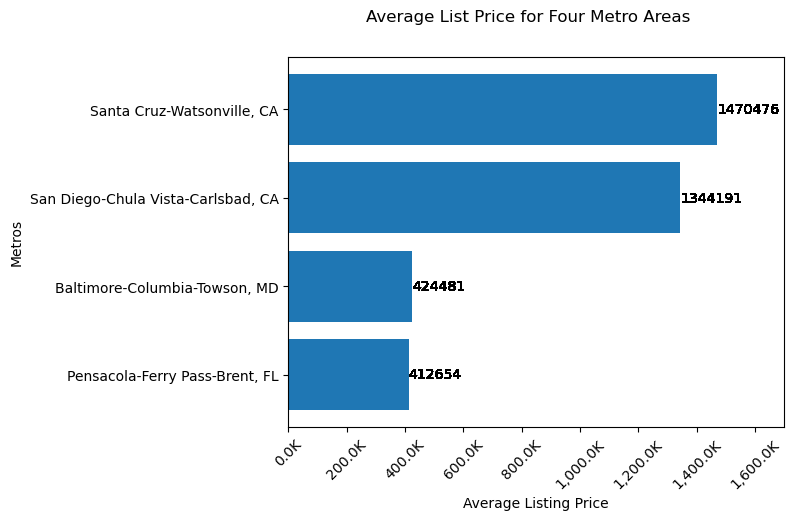

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
import matplotlib.ticker as ticker


#The speicfic areas that we will most likely go next:
# Baltimore-Columbia-Towson, MD
# San Diego-Chula Vista-Carlsbad, CA
# Pensacola-Ferry Pass-Brent, FL
# Santa Cruz-Watsonville, CA

specific_metros = metro_housing.loc[((metro_housing.cbsa_title == 'Baltimore-Columbia-Towson, MD') |
                                   (metro_housing.cbsa_title == 'San Diego-Chula Vista-Carlsbad, CA') |
                                    (metro_housing.cbsa_title == 'Pensacola-Ferry Pass-Brent, FL') |
                                    (metro_housing.cbsa_title == 'Santa Cruz-Watsonville, CA'))].copy()
specific_metros

specific_metros.cbsa_title.value_counts()

# # Graph the locations and average price to get a visual picture

specific_metros['avg_price_by_metro'] = specific_metros.groupby('cbsa_title')['average_listing_price'].transform('mean')

specific_metros.sort_values('avg_price_by_metro', ascending = True, inplace = True)

fig, ax = plt.subplots()

barplot = ax.barh('cbsa_title', 'avg_price_by_metro', data = specific_metros)
ax.xaxis.set_label_text('Average Listing Price')
ax.set_ylabel('Metros')
plt.xlim([0, 1700000])
ax.bar_label(ax.containers[0], fmt = '%d')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))
plt.xticks(rotation = 45)
fig.suptitle('Average List Price for Four Metro Areas')

plt.show()



### What factors can affect price?  Let's look!

<AxesSubplot:>

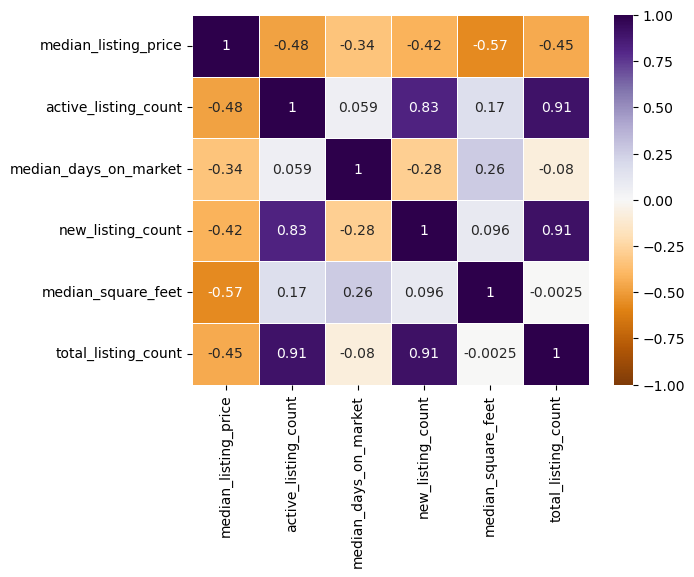

In [7]:
import seaborn as sns
#I will work with seaborn this time

metro_corr = specific_metros[['median_listing_price', 'active_listing_count', 'median_days_on_market',
                       'new_listing_count', 'median_square_feet', 'total_listing_count']].corr()

sns.heatmap(metro_corr,
            annot=True,
            linewidth=0.5,
            cmap='PuOr',
            vmin=-1,
            vmax=1)

-0.30512998518104356


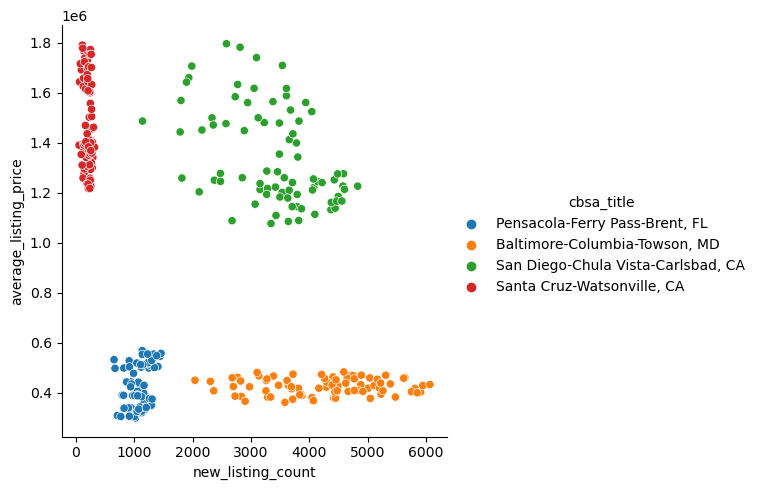

In [8]:

corr_new_price = specific_metros['new_listing_count'].corr(specific_metros['average_listing_price'])
print(corr_new_price)

sns.relplot(data = specific_metros, x = 'new_listing_count' , y = 'average_listing_price',
           hue = 'cbsa_title')

#Interesting! The negative correlation was a little misleading.  Looking at this visually, we see that there doesn't seem 
#to be much of a correlation between the amount of new listings and prices.  We see a wider range of prices in the 
#California regions, but that could be due to the varying areas surrounding.  While anecdotal, we were previously stationed 
#in San Diego, and the prices are significantly cheaper if you go south towards the border and inland rather than staying 
#on the water or close to downtown.

### Let's look the correlation between the median days on the market and the average price.  I would expect that the longer the house is on the market, the lower the price will be.

-0.4018125865599484


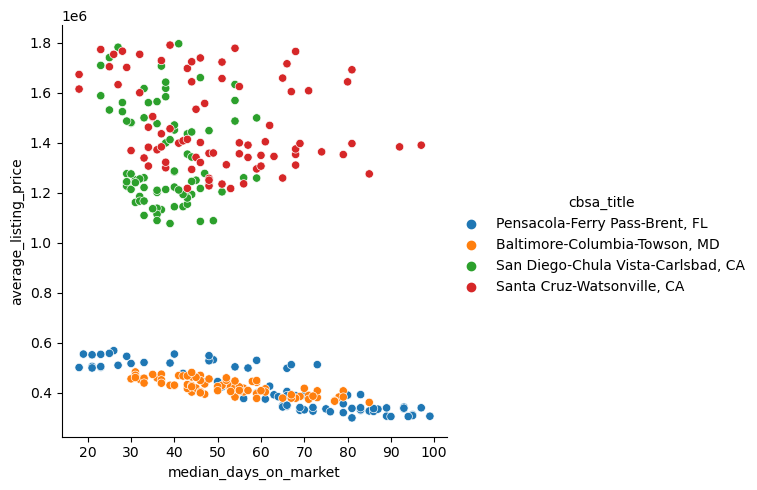

In [9]:


corr_time_on_market_price = specific_metros['median_days_on_market'].corr(specific_metros['average_listing_price'])
print(corr_time_on_market_price)

sns.relplot(data = specific_metros, x = 'median_days_on_market', y = 'average_listing_price',
           hue = 'cbsa_title')

#This shows a little more relationship between the two variables particularly with the Florida and Maryland metros.  The longer 
#the house is on the market, the chaper it is.  The California metros look mixed with a lot of outliers, so there doesn't seem
#to be anthing really clear.

### Let's look to see if there is a cheaper time to buy in these areas

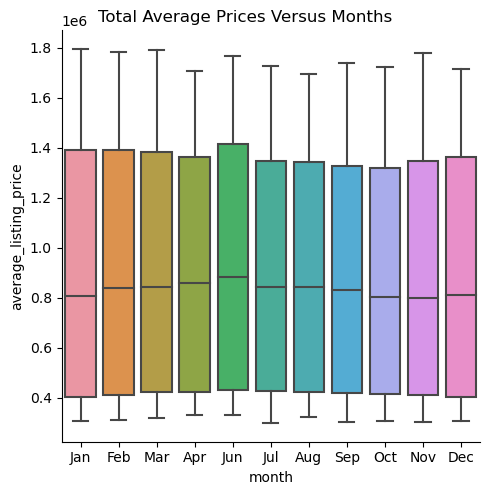

In [10]:
# Create new column that just shows the month
import matplotlib.dates as mdates

specific_metros['month'] = specific_metros['month_date_yyyymm'].dt.strftime('%b')

total = sns.catplot(data = specific_metros, x = 'month', y = 'average_listing_price', kind = 'box',
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
total.fig.suptitle('Total Average Prices Versus Months')
plt.show()

#I'm not seeing any big differences, other than June having a slightly higher price than the other months.

### What if I broke it down by specific areas?  Would there be a difference in the price and time of year?

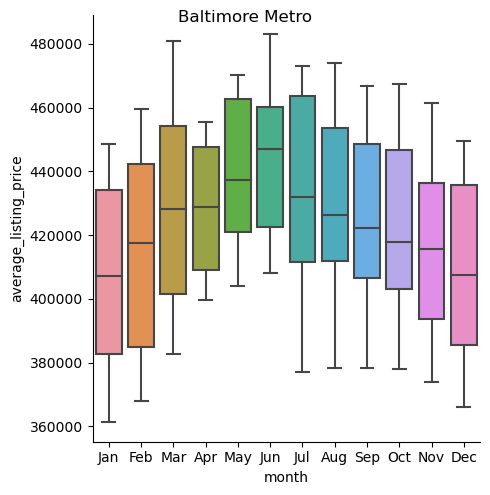

In [11]:
#Baltimore

baltimore_metro = specific_metros.loc[(specific_metros.cbsa_title == 'Baltimore-Columbia-Towson, MD')].copy()
baltimore_metro

plot1 = sns.catplot(data = baltimore_metro, x = 'month', y = 'average_listing_price', kind = 'box',
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plot1.fig.suptitle('Baltimore Metro')
plt.show()

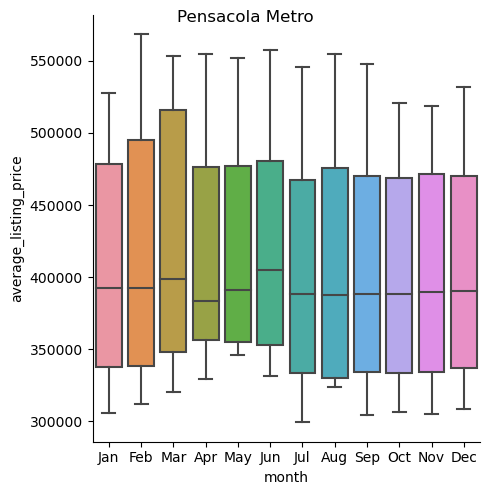

In [12]:
#Pensacola

pensacola_metro = specific_metros.loc[(specific_metros.cbsa_title == 'Pensacola-Ferry Pass-Brent, FL')].copy()

plot2 = sns.catplot(data = pensacola_metro, x = 'month', y = 'average_listing_price', kind = 'box',
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plot2.fig.suptitle('Pensacola Metro')
plt.show()

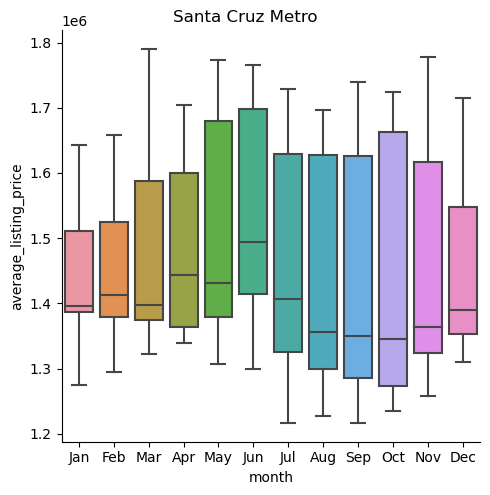

In [13]:
#Santa Cruz
santa_cruz_metro = specific_metros.loc[(specific_metros.cbsa_title == 'Santa Cruz-Watsonville, CA')].copy()

plot3 = sns.catplot(data = santa_cruz_metro, x = 'month', y = 'average_listing_price', kind = 'box',
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plot3.fig.suptitle('Santa Cruz Metro')
plt.show()

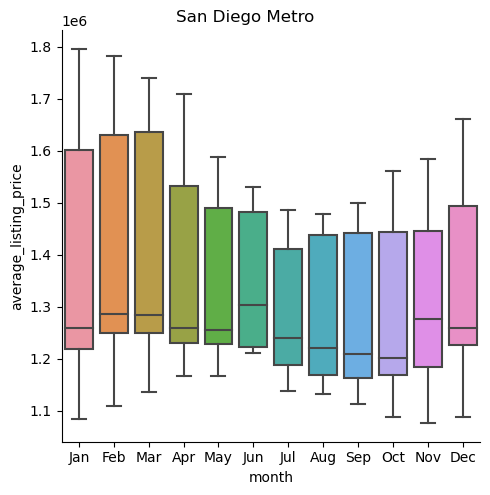

In [14]:
san_diego_metro = specific_metros.loc[(specific_metros.cbsa_title == 'San Diego-Chula Vista-Carlsbad, CA')].copy()

plot4 = sns.catplot(data = san_diego_metro, x = 'month', y = 'average_listing_price', kind = 'box',
           order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plot4.fig.suptitle('San Diego Metro')
plt.show()

### We see more differing prices through the season.  June appears to be the highest mean average price among all regions.  If we move to California, we are clearly going to be paying a lot more for housing, but the best time to buy looks to be in the late summer and early fall.  Pensacola seems to be pretty standard all the year with the exception of June, and purchasing in the winter or fall in Baltimore looks like it would be the best way to go.